# Quest 7

2017.csv 데이터를 사용하여,

• 간단한EDA
 
 • 데이터정규화 
 
 • 원하는두 변수를고른 후, k-means clustering 실시
 
 • 적정k 값찾기
 
 • 결과해석

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization

In [2]:
dataset = pd.read_csv('data/2017.csv')

In [5]:
dataset.shape

(155, 12)

In [6]:
dataset.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [7]:
dataset.info() #No missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


In [8]:
dataset.isnull().sum() #Missing values computation

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [23]:
X=dataset.iloc[:,[2,5]].values
#I select 2 features for k-means clustering

In [12]:
#정규화(Standardization)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [14]:
df = pd.DataFrame(X_scaled,columns=['happiness.score','GDP per capita'])
df.head()

,happiness.score,GDP per capita
0,1.935996,1.506188
1,1.922693,1.186518
2,1.906730,1.182345
3,1.897861,1.383442
4,1.875689,1.093985


In [15]:
df.shape

(155, 2)

### k-means clustering

In [16]:
from sklearn.cluster import KMeans
score=[]

In [17]:
for i in range(1,11): #k값 1~10개. 이렇게 늘어남에 따라 score값의 그래프?(밑)
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    score.append(kmeans.inertia_)

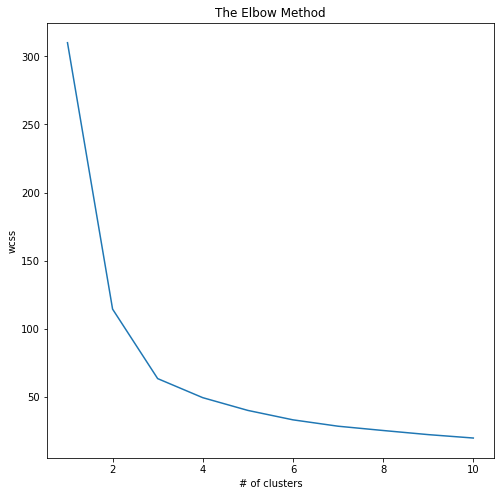

In [20]:
plt.figure(figsize=(8, 8))
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('wcss')
plt.show() #elbow값은 3. 가장 적절한 k는 3이다.

In [21]:
#Model Build
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X_scaled)

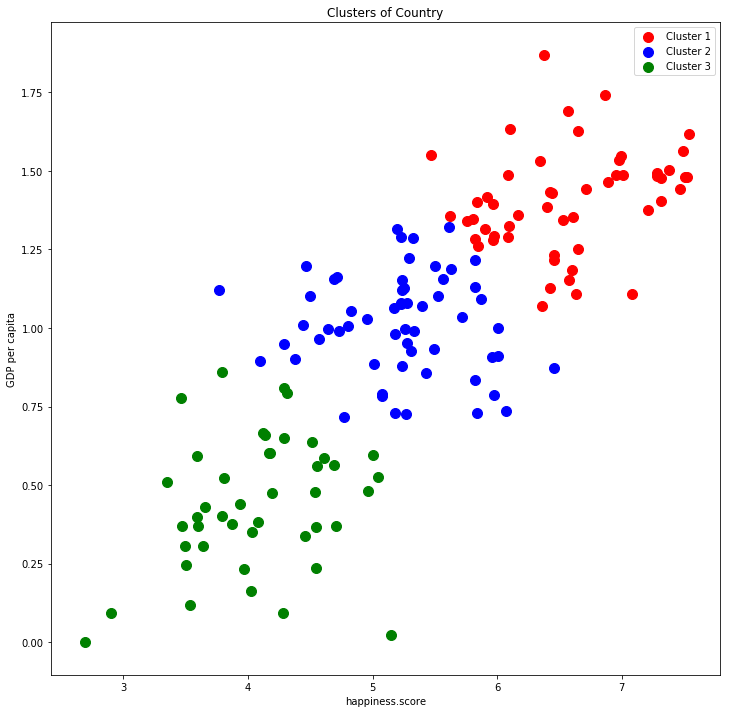

In [22]:
#Visualizing all clusters 
plt.figure(figsize=(12, 12))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Country')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')
plt.legend()
plt.show()


<결과 해석>
k-means를 이용해 clustering한 결과, 내가 선택한 2가지 변수(happiness score(행복 점수), GDP per capita(1인당 GDP))에 대한 가장 적절한 clsuter 개수는 3개로 나왔다.
그리고 scatter plot을 그려보니, 행복 점수와 GDP가 낮은 그룹, 중간 그룹, 둘 다 높은 그룹으로 분류된 것을 볼 수 있다.
즉 행복 점수와 GDP는 어느 정도 양의 상관성이 있는 것으로 보인다.